<a href="https://colab.research.google.com/github/AlbionKransiqi/Car-Classification-Deep-Learning/blob/main/Car_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## loading the data
train_car = glob("/content/drive/My Drive/Colab Notebooks/car_train/*/*")
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_test/*/*")

In [3]:
## loading the data
train_car = sorted(glob("/content/drive/My Drive/Colab Notebooks/car_data_2/train/*/*"))
test_car = sorted(glob("/content/drive/My Drive/Colab Notebooks/car_data_2/test/*/*"))

In [4]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[50::][:-9]
  #car_class = car.replace("/","").replace("\\","")[44::][:-9]
  return car_class

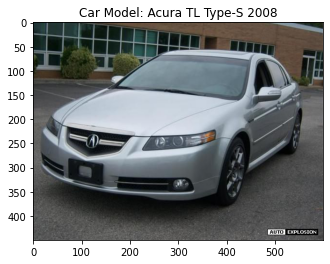

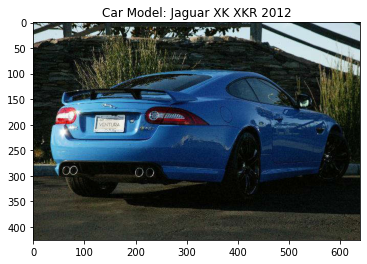

In [5]:
## showing some car images and their classes
for i in range(1,1000,500):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [6]:
def get_test_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[49::][:-9]
  #car_class = car.replace("/","").replace("\\","")[43::][:-9]
  return car_class

In [7]:
y_train = []
y_test = []

for i in range(len(train_car)): 
  y_train.append(get_car_class(train_car[i]))

for i in range(len(test_car)): 
    y_test.append(get_test_car_class(test_car[i]))

In [8]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
df_train_labels

,Cars,Make,Year
0,Acura TL Type-S 2008,Acura,2008
1,Acura TL Type-S 2008,Acura,2008
2,Acura TL Type-S 2008,Acura,2008
3,Acura TL Type-S 2008,Acura,2008
4,Acura TL Type-S 2008,Acura,2008
...,...,...,...
884,Volkswagen Golf Hatchback 2012,Volkswagen,2012
885,Volkswagen Golf Hatchback 2012,Volkswagen,2012
886,Volkswagen Golf Hatchback 2012,Volkswagen,2012
887,Volkswagen Golf Hatchback 2012,Volkswagen,2012


In [9]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]
df_test_labels

,Cars,Make,Year
0,Acura TL Type-S 2008,Acura,2008
1,Acura TL Type-S 2008,Acura,2008
2,Acura TL Type-S 2008,Acura,2008
3,Acura TL Type-S 2008,Acura,2008
4,Acura TL Type-S 2008,Acura,2008
...,...,...,...
872,Volkswagen Golf Hatchback 2012,Volkswagen,2012
873,Volkswagen Golf Hatchback 2012,Volkswagen,2012
874,Volkswagen Golf Hatchback 2012,Volkswagen,2012
875,Volkswagen Golf Hatchback 2012,Volkswagen,2012


**Data Exploration**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


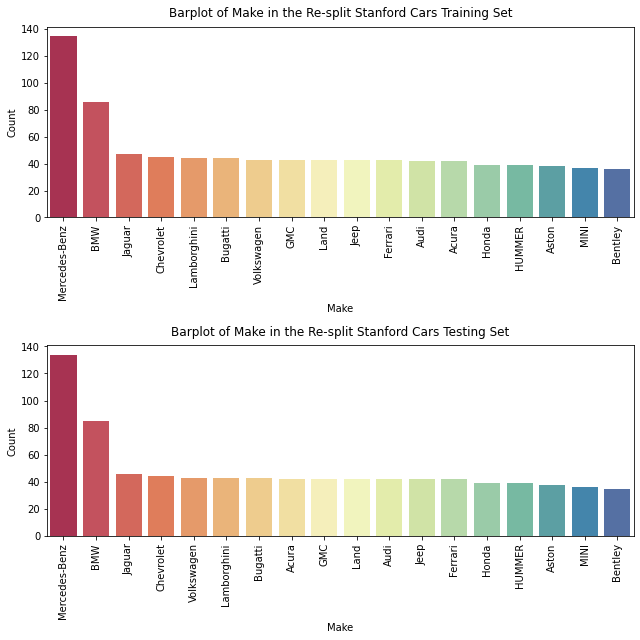

In [10]:
import seaborn as sns

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 9))
plt.subplot(2, 1, 1)

sns.countplot('Make', data = df_train_labels, order = df_train_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Re-split Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)

plt.subplot(2, 1, 2)
sns.countplot('Make', data = df_test_labels, order = df_test_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Re-split Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90), plt.tight_layout()
plt.show()

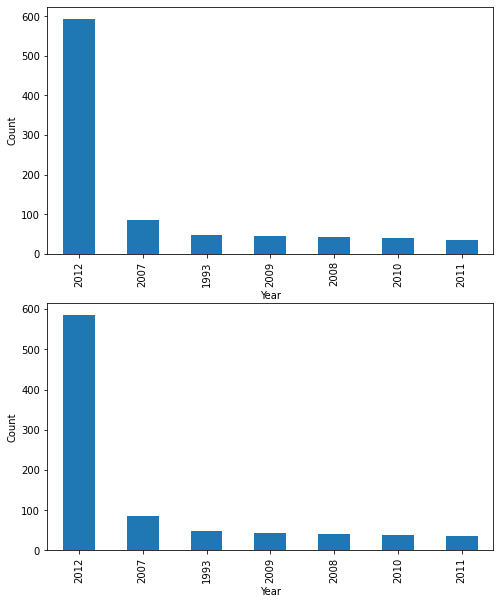

In [11]:
fig = plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
df_train_labels['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')


plt.subplot(2, 1, 2)
df_test_labels['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Supprt Vector Machines**

In [12]:
## we will processes all photos down to 128 pixels
## both in width and length  
img_size = (128,128)

## we will store in this list resized images
resized_images = []

## this function was adapted from 
## https://github.com/joelgrus/shirts/blob/master/visuals.py
def image_to_np_array(file):
    """
    This function takes a filename 
    1. opens it as a photo 
    2. modifies its original size
    3. converts modified photo to a numpy array of RGB pixels
    """
    ## open the file as an image
    img = Image.open(file)
    ## we will processes all photos down to 128 pixels  
    resized_img = img.resize(img_size)
    resized_images.append(resized_img)
    ## getting the data of risized image
    resized_img = list(resized_img.getdata())
    
    if np.shape(resized_img)[:] != (16384, 3):
      img = img.convert('YCbCr')
      resized_img = img.resize(img_size)
      resized_img = list(resized_img.getdata())

    map(list(), resized_img)
    ## creating an numpy array
    resized_img = np.array(resized_img)
    ## looking at the images shapes
    img_shape = resized_img.shape[0] * resized_img.shape[1]
    flatten_img = resized_img.reshape(1, img_shape)
    return flatten_img[0]

In [13]:
len(train_car)

889

In [14]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_train
X_train = []
y_train = []

## converting each photo into a numpy array of RGB pixels
## and extracting each car model from the picture
for i in range(len(train_car)): 
  X_train.append(image_to_np_array(train_car[i]))
  y_train.append(get_car_class(train_car[i]))

In [15]:
 ## creating a list where we will store np arrays of RGB pixels of each image
X_test = []
y_test = []

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)): 
    X_test.append(image_to_np_array(test_car[i]))
    y_test.append(get_test_car_class(test_car[i]))

**PCA**

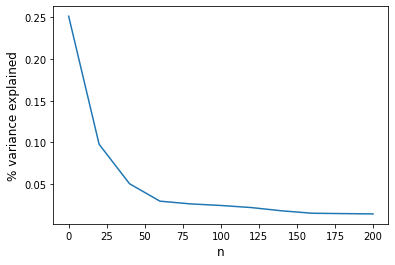

In [16]:
## Check for explained variace over n_components
pca = PCA()
## fitting the training data
pca.fit(X_train)

## creating a plot of explained variance in relation to nr. of component
plt.plot(list(range(0,201,20)), pca.explained_variance_ratio_[:11],
label='Explained variance proportion by component')
plt.xlabel(r'n', size=12)
plt.ylabel(r'% variance explained', size=12)
plt.show()

In [17]:
## conducting PCA with 140 principle components
n_comp = 140
pca = PCA(n_comp)
## fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

In [18]:
## the total variation was explained by 140 components
print(np.sum(pca.explained_variance_ratio_[:140]))

0.8454065015510016


In [19]:
## creating a Linear Support Vector Model for PCA
clf_PCA = LinearSVC(C = 1e-9)

## train logistic regression classifier on training data
clf_PCA.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
clf_PCA.score(PCA_X_train,y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:',clf_PCA.score(PCA_X_test,y_test))

Accuracy on training data: 0.5253093363329584
Accuracy on testing data: 0.1345496009122007


**Support Vector Machines**

In [20]:
## creating a function which will fit the model on the training data 
## and report the accuracy rates

def SVM_evaluation(X_train, y_train, X_test, y_test, clf):
    ## fitting the training data to SVC model
    clf.fit(X_train, y_train)
    ## predicting training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_pred, y_train)    
    test_accuracy = accuracy_score(y_test_pred, y_test)
    
    print("Accuracy on training data:", train_accuracy)
    print("Accuracy on testing data:", test_accuracy)
    return None # train_accuracy, test_accuracy

In [21]:
#Creating my model
clf_rbf = svm.SVC(kernel='rbf', gamma='auto')

print("SVM with a RBF kernel:")
SVM_evaluation(X_train,y_train, X_test, y_test, clf_rbf)

SVM with a RBF kernel:
Accuracy on training data: 1.0
Accuracy on testing data: 0.05473204104903079


## Random Forest

In [22]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=50)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
ytest_labels_rf = randomforest.predict(X_test)
ytest_prob_rf = randomforest.predict_proba(X_test)
train_score_rf = randomforest.score(X_train, y_train)
test_score_rf = randomforest.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf))

Train Score for the Random Forest Classifier: 1.000
Test Score for the Random Forest Classifier: 0.169


In [24]:
randomforest2 = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=5, random_state=333)
randomforest2.fit(X_train, y_train)

ytest_labels_rf = randomforest2.predict(X_test)
ytest_prob_rf = randomforest2.predict_proba(X_test)
train_score_rf = randomforest2.score(X_train, y_train)
test_score_rf = randomforest2.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf))

Train Score for the Random Forest Classifier: 0.994
Test Score for the Random Forest Classifier: 0.148


In [25]:
print(classification_report(y_test, randomforest.predict(X_test)))

                                          precision    recall  f1-score   support

                    Acura TL Type-S 2008       0.10      0.12      0.11        42
          Aston Martin Virage Coupe 2012       0.36      0.34      0.35        38
                Audi S5 Convertible 2012       0.20      0.12      0.15        42
           BMW 6 Series Convertible 2007       0.18      0.14      0.15        44
                         BMW X5 SUV 2007       0.12      0.12      0.12        41
             Bentley Mulsanne Sedan 2011       0.14      0.09      0.11        35
          Bugatti Veyron 16.4 Coupe 2009       0.16      0.19      0.17        43
       Chevrolet Camaro Convertible 2012       0.06      0.05      0.05        44
           Ferrari 458 Italia Coupe 2012       0.27      0.29      0.28        42
               GMC Yukon Hybrid SUV 2012       0.08      0.07      0.07        42
                HUMMER H3T Crew Cab 2010       0.30      0.15      0.20        39
               